In [ ]:
!pip install -q kaggle 

In [ ]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ihebbouariche","key":"65b046214dca53420428236203d2b8c0"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
! kaggle datasets list 

ref                                                             title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                              Data Science Job Salaries                        7KB  2022-06-15 08:59:12          21142        650  1.0              
josephcheng123456/olympic-historical-dataset-from-olympediaorg  Olympic Historical Dataset From Olympedia.org   25MB  2022-08-18 14:18:14            663         27  1.0              
deepcontractor/mcdonalds-india-menu-nutrition-facts             McDonald's India : Menu Nutrition Dataset        5KB  2022-07-28 17:08:52           1690         90  0.9411765        
gpreda/life-expectancy-in-europe-by-age-and-sex                 Life Expectancy in Eu

In [ ]:
#copy the kaggle api commande and past it here
!kaggle datasets download -d shashankrapolu/human-action-recognition-dataset

human-action-recognition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip data file
import zipfile

path = './human-action-recognition-dataset.zip'
zip_ref = zipfile.ZipFile(path , 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os 
train_dir = os.path.join('/content/Structured/train')

In [ ]:
classes = os.listdir(train_dir)
print(classes)

['hugging', 'sitting', 'texting', 'clapping', 'dancing', 'running', 'fighting', 'eating', 'calling', 'drinking', 'cycling', 'laughing', 'using_laptop', 'listening_to_music', 'sleeping']


In [ ]:
num_output = len(classes)

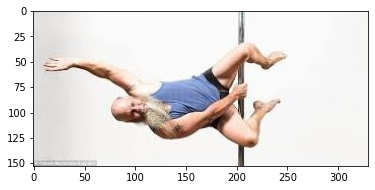

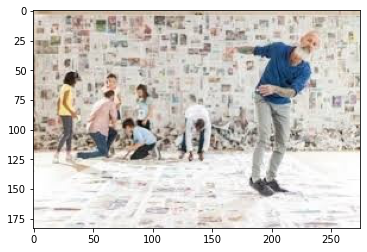

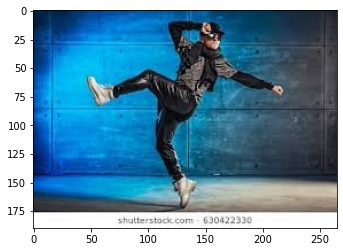

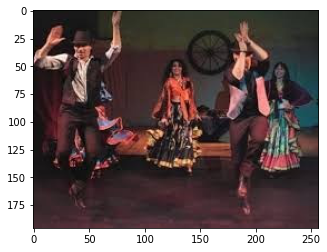

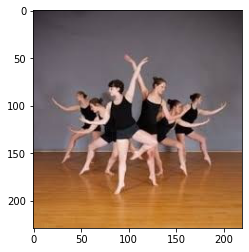

In [ ]:
#plot images 
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
dancing_dir = os.path.join(train_dir,'./dancing')
example = [os.path.join(dancing_dir,fname) 
           for fname in os.listdir(dancing_dir)]
for i in range(5):
  image=mpimg.imread(example[i])
  plt.imshow(image)
  plt.show()

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32,3,activation="relu",input_shape = (255,255,3)),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(num_output,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 460800)            0

In [ ]:
#Data preprocessing and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1.0/255,
                               rotation_range = 40,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

image_data = image_gen.flow_from_directory(train_dir , batch_size = 30 , class_mode = 'categorical' , target_size=(255,255) , shuffle= True)

val_dir = os.path.join('/content/Structured/test')
image_data_validation = image_gen.flow_from_directory(val_dir, target_size=(255,255))

Found 10710 images belonging to 15 classes.
Found 1890 images belonging to 15 classes.


In [ ]:
model.compile(loss = 'categorical_crossentropy' , optimizer = keras.optimizers.Adam(0.001),metrics=["accuracy"])
history = model.fit(image_data,validation_data = image_data_validation , shuffle = True , epochs = 50)

Epoch 1/50
357/357 [==============================] - 1596s 4s/step - loss: 2.7353 - accuracy: 0.0692 - val_loss: 2.6964 - val_accuracy: 0.0767
Epoch 2/50
357/357 [==============================] - 1588s 4s/step - loss: 2.6723 - accuracy: 0.0943 - val_loss: 2.6342 - val_accuracy: 0.0974
Epoch 3/50
 75/357 [=====>........................] - ETA: 19:34 - loss: 2.6437 - accuracy: 0.1116